<h1><center><font color='indigo'>Credit EDA Case Study</font></center></h1>

The objective of this case study is to identify which factors may aggregratively lead to defaultness behaviour in the clients. By identifying the warning factors we may be able to selectively set interest rates for potential default clients. We shall also strategise our loans so that we may be able to capture higher market share without increasing the NPA of the bank.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_info_columns',122)

In [3]:
#read the data set of "application_data" in application_df.
application_df= pd.read_csv(r'application_data.csv')
#application_df= pd.read_csv(r'C:\Users\Sam\application_data (1).csv')
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
application_df.shape

(307511, 122)

In [5]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

## 1. Data Quality checks and handling missing values

### 1.1 Inspecting the null values

In [6]:
application_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
# finding the percentage of missing values in each column in the application dataframe 

missing_data_col=(application_df.isnull().sum()/len(application_df.index))*100
missing_data_col

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [8]:
# finding those columns which have more than and equal to 40% missing values

missing_data_col=missing_data_col[missing_data_col.values>=40]
missing_data_col.count()

49

There are 49 columns who have missing values more than 40% , so we remove these 49 columns from our application_df dataframe.

In [9]:
# Removing those 49 columns from our application_df dataframe.
list_empty_cols=list(missing_data_col[missing_data_col.values>=40].index) 
# len(list_empty_cols)
application_df.drop(labels=list_empty_cols,axis=1,inplace=True)

application_df.shape

(307511, 73)

In [10]:
#Checking for null percentage in columns again

(application_df.isnull().sum()/len(application_df.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

There are columns that are not necessary for our analysis , therefore we are going to remove these columns alongwith some other unnecessary columns.

In [11]:
# Removing unnecessary columns from the dataset

columns_not_req =['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_2','EXT_SOURCE_3','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','OCCUPATION_TYPE']

application_df.drop(labels=columns_not_req,axis=1,inplace=True)

In [12]:
application_df.shape

(307511, 28)

In [13]:
#Checking for the null values percentage in the columns again
(application_df.isnull().sum()/len(application_df.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000


### 1.2 Investigating the missing values

Now also some columns are present with very less missing values namely:<br>
imputing these values with mean and mode<br>
AMT_ANNUITY               -         0.003902
<br>AMT_GOODS_PRICE       -         0.090403
<br>NAME_TYPE_SUITE       -         0.420148

We will analyse these columns and report the best metric that can be used to impute a missing value in these columns.

In [14]:
#using mode to replace null values in column 'NAME_TYPE_SUITE'
application_df['NAME_TYPE_SUITE'].fillna(application_df['NAME_TYPE_SUITE'].mode()[0], inplace = True)

In [15]:
#Checking for the null values percentage in the columns again
(application_df.isnull().sum()/len(application_df.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000


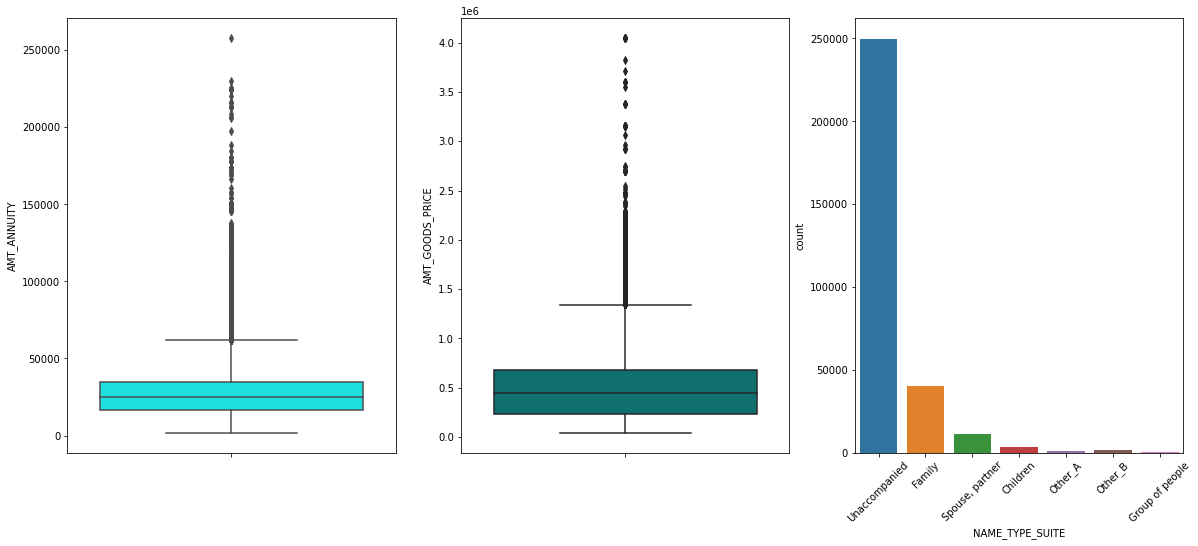

In [16]:
# Drawing the subplots in order to analyse all the above three columns missing values percentages:

plt.figure(figsize=(20,8))

#Plotting a boxplot for "AMT_ANNUITY" column to find out if outliers are present.
plt.subplot(1,3,1)
sns.boxplot(y=application_df["AMT_ANNUITY"], color = 'cyan')


#Plotting a boxplot for "AMT_GOODS_PRICE" column to find out if outliers are present.
plt.subplot(1,3,2)
sns.boxplot(y=application_df["AMT_GOODS_PRICE"] , color ='teal')

#Plotting a countplot for "NAME_TYPE_SUITE" which is a categorical column ,for finding out which category in this column which has the most number of counts.
plt.subplot(1,3,3)
sns.countplot(x="NAME_TYPE_SUITE",data=application_df)
plt.xticks(rotation=45)
plt.show()

#### 1.2.1 Analysing the AMT_ANNUITY column

From the above subplot 1 ,  we see that this column has outliers so we cannot fill the missing values with mean . Hence when outliers are present , then the best metric to fill these missing values would be Median value because median is not affected by outliers .  So next we find the median for this column.

In [17]:
application_df["AMT_ANNUITY"].median()

24903.0

So we can impute the missing values in the "AMT_ANNUITY" column with the median value which is 24903.

#### 1.2.2 Analysing the AMT_GOODS_PRICE

From the above subplot 2 , we see that this column has outliers so we cannot fill the missing values with mean . Hence when outliers are present , then the best metric to fill these missing values would be Median value because  median is not affected by outliers .  So next we find the median for this column.

In [18]:
application_df["AMT_GOODS_PRICE"].median()

450000.0

#### 1.2.3 Analysing the NAME_TYPE_SUITE

Since this is a categorical column , from the above plotted subplot 3 , we can see that the category ="Unaccompanied" is having the most number of counts , therefore it will suitable to impute the missing values in this column by the category "Unaccompanied"  since it is the Mode value and imputing with this , it won't affect our analysis. 

### 1.3 Imputing missing values 

In [19]:
#using mode to replace null values in column 'NAME_TYPE_SUITE'
application_df['NAME_TYPE_SUITE'].fillna(application_df['NAME_TYPE_SUITE'].mode()[0], inplace = True)

In [20]:
#using median to replace null values in column 'AMT_GOODS_PRICE'
application_df['AMT_GOODS_PRICE'].fillna(application_df['AMT_GOODS_PRICE'].median(), inplace = True)

In [21]:
#using median to replace null values in column 'AMT_ANNUITY'
application_df['AMT_ANNUITY'].fillna(application_df['AMT_ANNUITY'].median(), inplace = True)

In [22]:
#Checking for the null values percentage in the columns again
(application_df.isnull().sum()/len(application_df.index))*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE              0.0
dtype: float64

### 1.4 Analysing the datatypes and values of the columns

In [23]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [24]:
#Checking the values in  the following columns : "DAYS_BIRTH",'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'

application_df[["DAYS_BIRTH",'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
...,...,...,...,...
307506,-9327,-236,-8456.0,-1982
307507,-20775,365243,-4388.0,-4090
307508,-14966,-7921,-6737.0,-5150
307509,-11961,-4786,-2562.0,-931


From above we see that there are negative values in the columns: "DAYS_BIRTH",'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'

So we need to convert the negative values in the columns into positive values because these columns should not contain negative values. 

In [25]:
# Converting the negative values in the columns into positive values

application_df['DAYS_BIRTH'] = application_df['DAYS_BIRTH'].abs()
application_df['DAYS_EMPLOYED'] = application_df['DAYS_EMPLOYED'].abs()
application_df['DAYS_REGISTRATION'] = application_df['DAYS_REGISTRATION'].abs()
application_df['DAYS_ID_PUBLISH'] = application_df['DAYS_ID_PUBLISH'].abs()


In [26]:
application_df[["DAYS_BIRTH",'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531
3,19005,3039,9833.0,2437
4,19932,3038,4311.0,3458
...,...,...,...,...
307506,9327,236,8456.0,1982
307507,20775,365243,4388.0,4090
307508,14966,7921,6737.0,5150
307509,11961,4786,2562.0,931


Since the columns "HOUR_APPR_PROCESS_START" have the datatype as int64 ,we can convert the datatype of this columns into pandas datetime format .

In [27]:
application_df['HOUR_APPR_PROCESS_START'] = pd.to_datetime(application_df['HOUR_APPR_PROCESS_START']) 
application_df['HOUR_APPR_PROCESS_START']

0        1970-01-01 00:00:00.000000010
1        1970-01-01 00:00:00.000000011
2        1970-01-01 00:00:00.000000009
3        1970-01-01 00:00:00.000000017
4        1970-01-01 00:00:00.000000011
                      ...             
307506   1970-01-01 00:00:00.000000015
307507   1970-01-01 00:00:00.000000008
307508   1970-01-01 00:00:00.000000009
307509   1970-01-01 00:00:00.000000009
307510   1970-01-01 00:00:00.000000020
Name: HOUR_APPR_PROCESS_START, Length: 307511, dtype: datetime64[ns]

#### 1.4.1 Analysing some categorical columns

#### correcting the 'CODE_GENDER' column

In [28]:
application_df['CODE_GENDER'].value_counts()       

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Since this column contains XNA values , we can replace these 4 columns with XNA values with the MODE value ie., Gender ='F' , as it won't make affect our dataset.

In [29]:
# Replacing 'CODE_GENDER' column with "F" 

application_df.loc[application_df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
application_df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### correcting the 'ORGANIZATION_TYPE' column

In [30]:
application_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [31]:
application_df['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

For column 'ORGANIZATION_TYPE', we have total 307511 rows of which 55374 rows are having 'XNA' values , which is equal to 18% which means that 18% of the column is having this 'XNA' values. So we can drop these 55374 rows, as dropping 18%(very less) rows will not affect our dataset.

In [32]:
# dropping 55374 rows which have 'XNA' values in the ORGANIZATION_TYPE column

application_df=application_df.drop(application_df.loc[application_df['ORGANIZATION_TYPE']=='XNA'].index)
application_df[application_df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

So rows with XNA values are removed from the column  ORGANIZATION_TYPE 

#### 1.4.2 Correcting numeric columns into the correct datatype

In [33]:
# Converting all the numeric columns into numeric so that all the columns are converted into their correct datatypes.

numeric_cols=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

application_df[numeric_cols]=application_df[numeric_cols].apply(pd.to_numeric)
application_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,1,1,Religion


### 1.5 Handling Continuous variables

So we have Continuous variables : AMT_CREDIT and AMT_INCOME_TOTAL.<br>
We can use binning for these continuous variables and diving them into slots 

In [34]:
# Making bins for AMT_CREDIT amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_df['RANGE_AMT_CREDIT']=pd.cut(application_df['AMT_CREDIT'],bins=bins,labels=slots)


In [35]:
application_df['RANGE_AMT_CREDIT'].head()

0       400000-450000
1    900000 and above
2            0-150000
3       300000-350000
4       500000-550000
Name: RANGE_AMT_CREDIT, dtype: category
Categories (17, object): [0-150000 < 150000-200000 < 200000-250000 < 250000-300000 ... 750000-800000 < 800000-850000 < 850000-900000 < 900000 and above]

In [36]:
# Making bins for AMT_INCOME_TOTAL amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_df['RANGE_AMT_INCOME']=pd.cut(application_df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [37]:
application_df['RANGE_AMT_INCOME'].head()

0    200000-225000
1    250000-275000
2      50000-75000
3    125000-150000
4    100000-125000
Name: RANGE_AMT_INCOME, dtype: category
Categories (21, object): [0-25000 < 25000-50000 < 50000-75000 < 75000,100000 ... 425000-450000 < 450000-475000 < 475000-500000 < 500000 and above]

### 1.6 Division of the dataset into two datasets

- target=1(client with payment difficulties) 
- target=0(all other)

In [38]:
df_target_0=application_df.loc[application_df["TARGET"]==0]
df_target_1=application_df.loc[application_df["TARGET"]==1]

In [39]:
df_target_0.shape

(230302, 30)

In [40]:
df_target_1.shape

(21835, 30)

In [41]:
df_target_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230302 entries, 1 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   230302 non-null  int64   
 1   TARGET                       230302 non-null  int64   
 2   NAME_CONTRACT_TYPE           230302 non-null  object  
 3   CODE_GENDER                  230302 non-null  object  
 4   FLAG_OWN_CAR                 230302 non-null  object  
 5   FLAG_OWN_REALTY              230302 non-null  object  
 6   CNT_CHILDREN                 230302 non-null  int64   
 7   AMT_INCOME_TOTAL             230302 non-null  float64 
 8   AMT_CREDIT                   230302 non-null  float64 
 9   AMT_ANNUITY                  230302 non-null  float64 
 10  AMT_GOODS_PRICE              230302 non-null  float64 
 11  NAME_TYPE_SUITE              230302 non-null  object  
 12  NAME_INCOME_TYPE             230302 non-null

In [42]:
df_target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,RANGE_AMT_CREDIT,RANGE_AMT_INCOME
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,School,900000 and above,250000-275000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,Government,0-150000,50000-75000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,300000-350000,125000-150000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,1,1,Religion,500000-550000,100000-125000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,WEDNESDAY,16,0,0,0,0,Other,450000-500000,"75000,100000"


# 2. UNIVARIATE ANALYSIS for Categorical Variables

### 2.1 Univariate analysis for Clients with payment difficulty (Target 0)

### 2.1.1 Income range


 > All the graphs are on log scale unless specified otherwise.

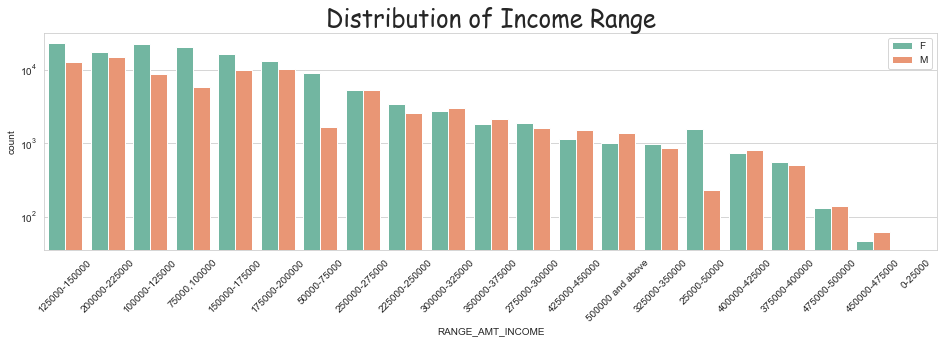

In [43]:
# Plotting for income range
plt.figure(figsize=(16,4))
sns.set_style('whitegrid')
plt.title("Distribution of Income Range", fontname='comic sans MS', fontsize=24)
sns.countplot(x="RANGE_AMT_INCOME",data=df_target_0,hue='CODE_GENDER',order=df_target_0['RANGE_AMT_INCOME'].value_counts().index, palette="Set2")
plt.yscale('log')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

INFERENCES

1. Female count is higher than male.

2. Income range from 100000 to 200000 is having more number of credits.

3. Income range below 400000 have least number of credits.



#### 2.1.2 Distribution of Income over Profession

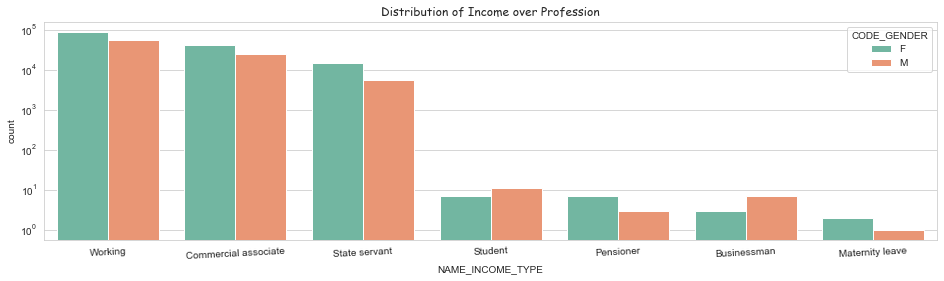

In [44]:
# Plotting for Income type
sns.set_style('whitegrid')
plt.figure(figsize=(16,4))
plt.title("Distribution of Income over Profession", fontname='comic sans MS')
sns.countplot(x="NAME_INCOME_TYPE",data=df_target_0,hue='CODE_GENDER',order=df_target_0['NAME_INCOME_TYPE'].value_counts().index, palette="Set2")
plt.yscale('log')
plt.xticks(rotation=3)

plt.show()

INFERENCES

1. ‘working’, ’commercial associate’, and ‘State Servant’ professions have higher number of credits.

2. Females are having more number of credits than male.

3. ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’ have less credits.

#### 2.1.3 Type of Loan

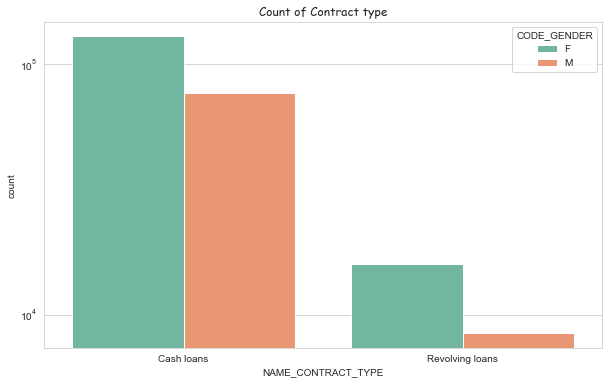

In [45]:
# Plotting for Contract type
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plt.title("Count of Contract type",fontname='comic sans MS')
sns.countplot(x="NAME_CONTRACT_TYPE",data=df_target_0,hue='CODE_GENDER',order=df_target_0['NAME_CONTRACT_TYPE'].value_counts().index,palette="Set2")
plt.yscale('log')
plt.xticks(rotation=0)
plt.show()

INFERENCES

1. Contract type ‘cash loans’ has higher number of credits than ‘Revolving loans’ contract type.

2. In both the contract types female count is higher.


#### 2.1.4 Organization type

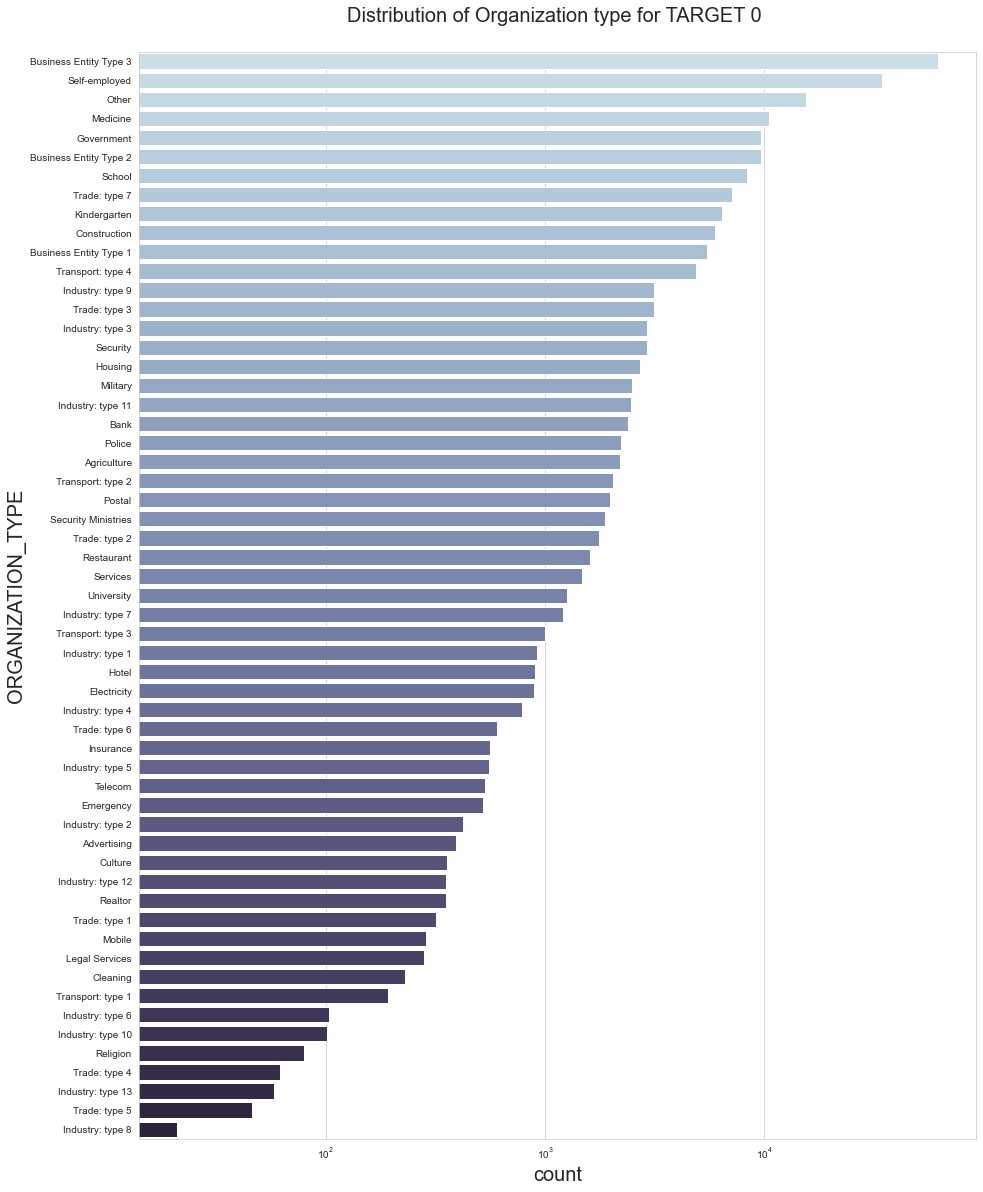

In [46]:
# Plotting for Organization type 
plt.figure(figsize=(15,20))
sns.set_style('whitegrid')
plt.rcParams['axes.titlepad'] = 30
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 20
plt.title("Distribution of Organization type for TARGET 0 ")
sns.countplot(y="ORGANIZATION_TYPE",data=df_target_0,order=df_target_0['ORGANIZATION_TYPE'].value_counts().index, palette="ch:s=.25,rot=-.25")
plt.xscale('log')
plt.show()


INFERENCES
 
1. Most of the clients who have applied for loan are mainly from the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.

2. Very Few clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.

#### 2.1.5 Family status of target 0

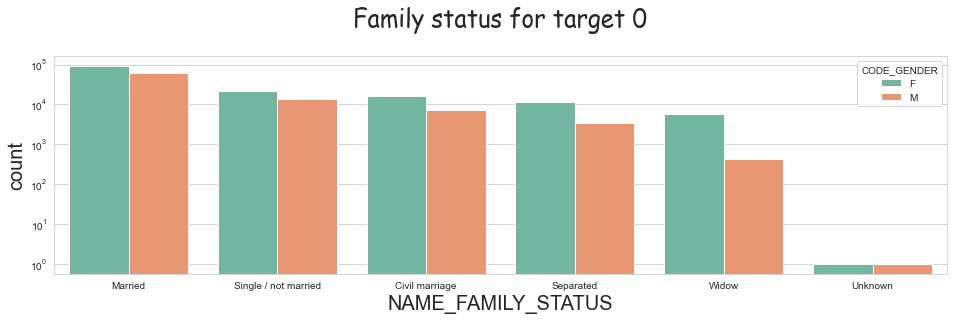

In [47]:
plt.figure(figsize=(16,4))
sns.set_style('whitegrid')
plt.title("Family status for target 0", fontname='comic sans MS', fontsize=24)
sns.countplot(x="NAME_FAMILY_STATUS",data=df_target_0,hue='CODE_GENDER',order=df_target_0['NAME_FAMILY_STATUS'].value_counts().index, palette="Set2")
plt.yscale('log')
plt.xticks(rotation=0)
plt.show()

INFERENCES

1. 'Married' customers have the maximum number of credits.

2. Females have more number of credits than male.

3. Less number of credits for status type  ‘widow’ and 'unknowns'.

### 2.2 Univariate analysis for TARGET=1 (client with payment difficulties)

#### 2.2.1 Income range

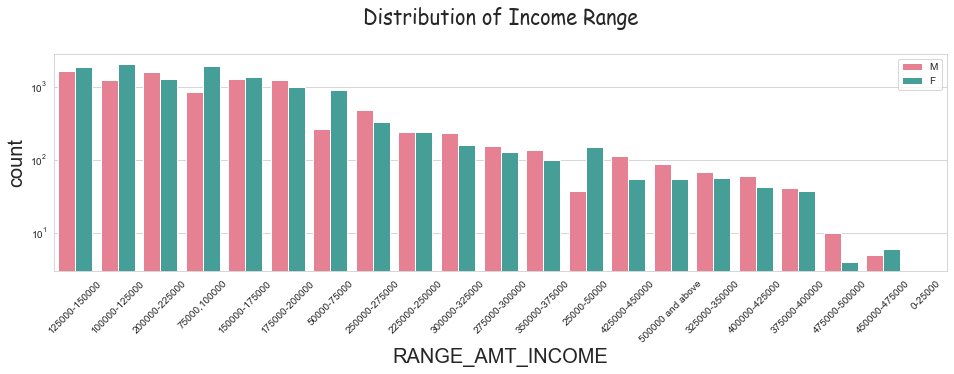

In [48]:
# PLotting for income range
plt.figure(figsize=(16,4))
sns.set_style('whitegrid')
plt.title("Distribution of Income Range", fontname='comic sans MS')
sns.countplot(x="RANGE_AMT_INCOME",data=df_target_1,hue='CODE_GENDER',order=df_target_1['RANGE_AMT_INCOME'].value_counts().index,palette="husl")
plt.yscale('log')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

INFERENCES

1. Female count is higher than male.

2. Income range from 100000 to 200000 is having more number of credits.

3. Very less count for income range 400000 and above.

#### 2.2.2 Distribution of Income over Profession

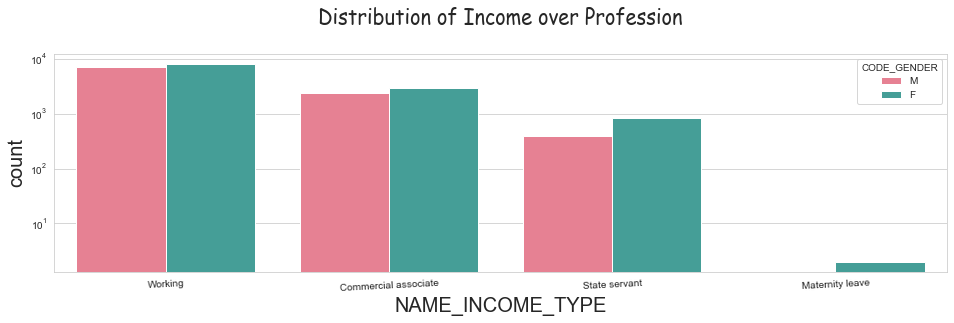

In [49]:
# Plotting for Income type
sns.set_style('whitegrid')
plt.figure(figsize=(16,4))
plt.title("Distribution of Income over Profession", fontname='comic sans MS')
sns.countplot(x="NAME_INCOME_TYPE",data=df_target_1,hue='CODE_GENDER',order=df_target_1['NAME_INCOME_TYPE'].value_counts().index,palette="husl")
plt.yscale('log')
plt.xticks(rotation=3)
plt.show()

INFERENCES
1. ‘working’, ’commercial associate’, and ‘State Servant’ professions have higher number of credits.

2.  Females have high number of credits than male.

3. Less number of credits for income type  ‘Maternity leave’.

#### 2.2.3 Type of Loan

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

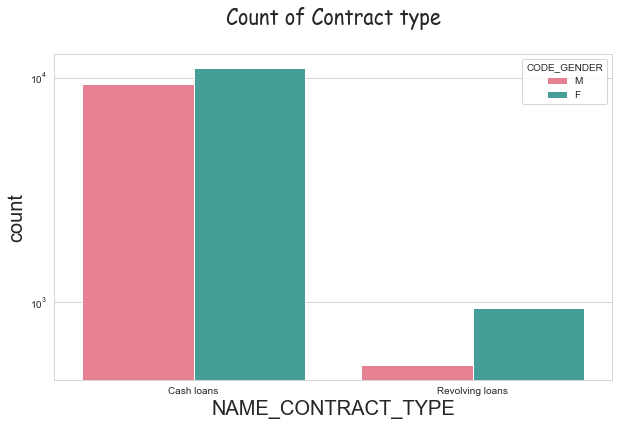

In [50]:
# Plotting for Contract type
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plt.title("Count of Contract type",fontname='comic sans MS')
sns.countplot(x="NAME_CONTRACT_TYPE",data=df_target_1,hue='CODE_GENDER',order=df_target_1['NAME_CONTRACT_TYPE'].value_counts().index, palette="husl")
plt.yscale('log')
plt.xticks(rotation=0)

INFERENCES

1. Contract type ‘cash loans’ has higher number of credits than ‘Revolving loans’ contract type.

2. High number of female credits  can be observed.



#### 2.2.4 Organization type

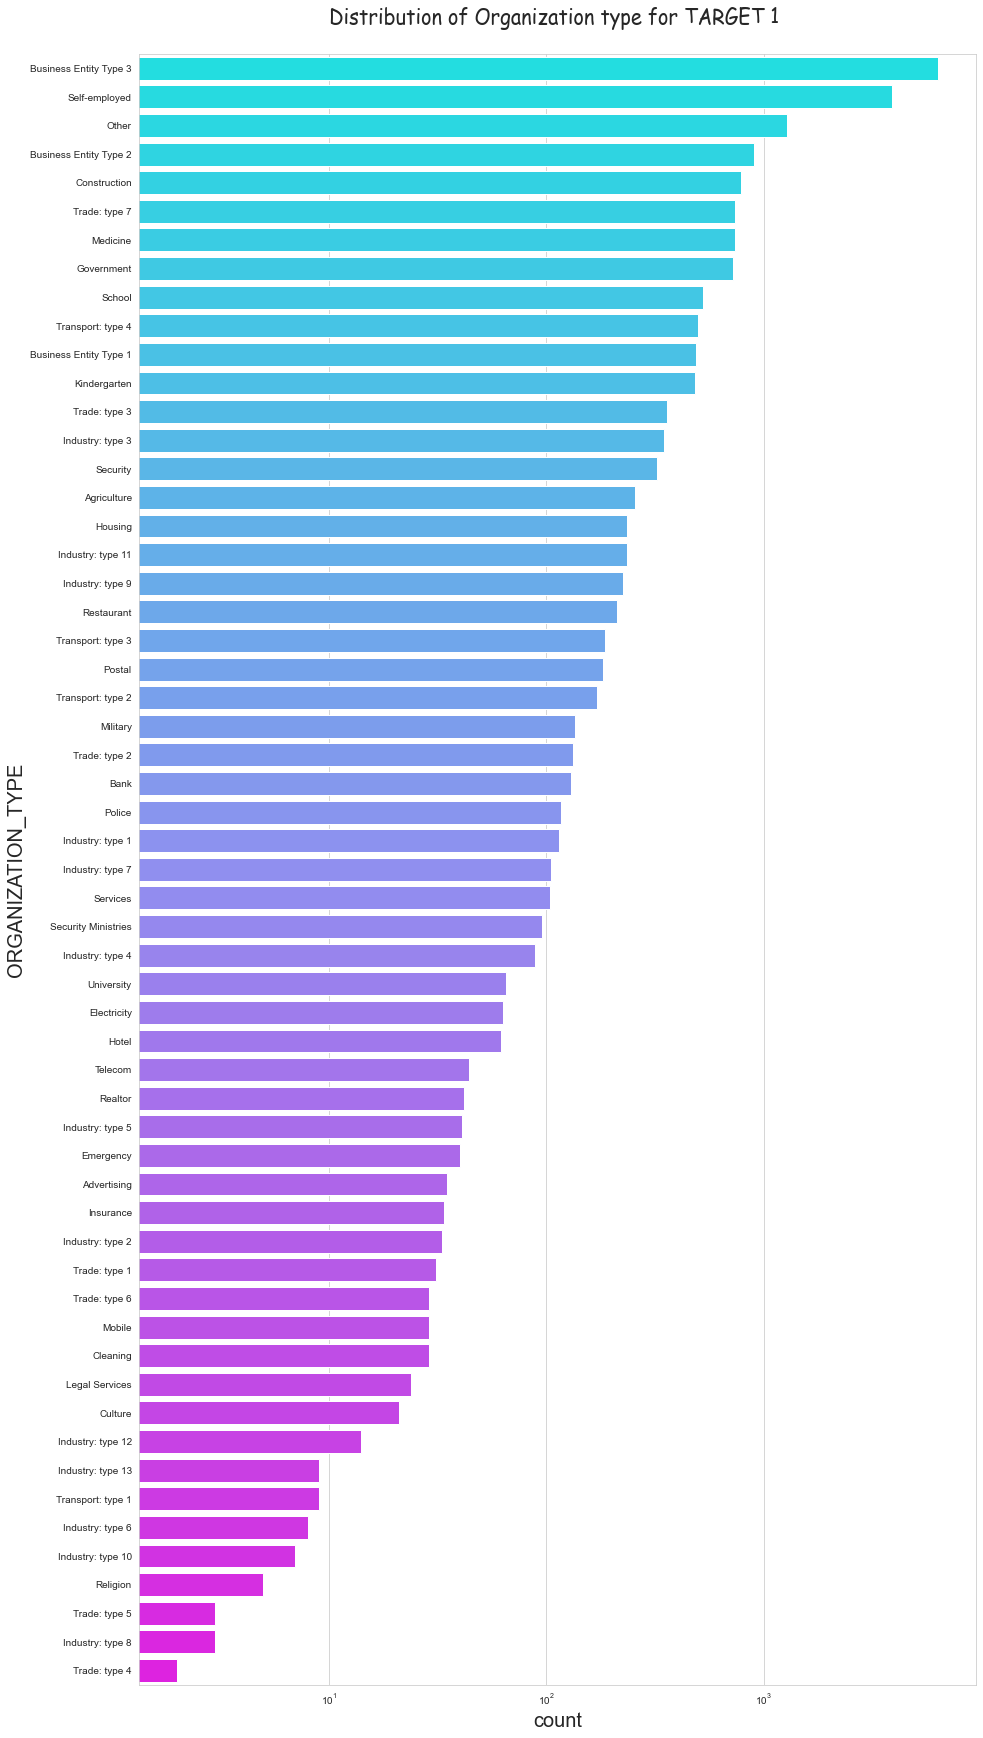

In [51]:
# Plotting for Organization type 
plt.figure(figsize=(15,30))
sns.set_style('whitegrid')
plt.rcParams['axes.titlepad'] = 30
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 20
plt.title("Distribution of Organization type for TARGET 1 ",fontname='comic sans MS')
sns.countplot(y="ORGANIZATION_TYPE",data=df_target_1,order=df_target_1['ORGANIZATION_TYPE'].value_counts().index,palette='cool')
plt.xscale('log')


INFERENCES

1. Clients who have applied for credits are mostly from of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.

2. Few clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.

3. Same as target 0 in distribution of organization type.

#### 2.2.5 Family status 

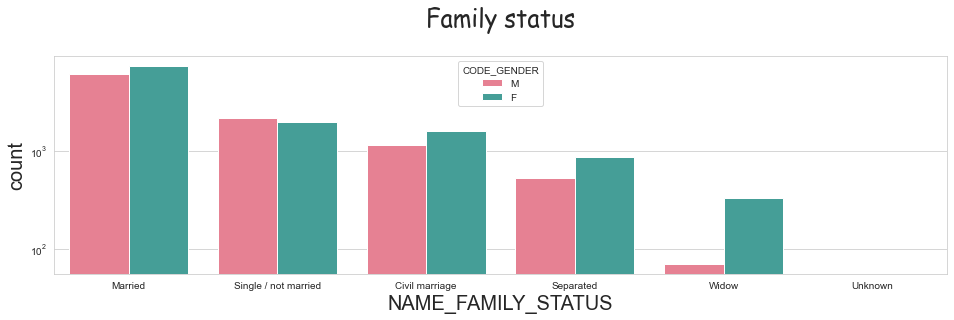

In [52]:
plt.figure(figsize=(16,4))
sns.set_style('whitegrid')
plt.title("Family status", fontname='comic sans MS', fontsize=24)
sns.countplot(x="NAME_FAMILY_STATUS",data=df_target_1,hue='CODE_GENDER',order=df_target_0['NAME_FAMILY_STATUS'].value_counts().index,palette="husl")
plt.yscale('log')
plt.xticks(rotation=0)
plt.show()

INFERENCES

1. Married clients have higher number of credits than others.


2. Less number of credits for status type  ‘widow’ and 'unknowns'.

## 3. Correlations among the columns

In [53]:
# Finding some correlation for numerical columns for both target 0 and 1 

df_target_0_corr=df_target_0.iloc[0:,2:]
df_target_1_corr=df_target_1.iloc[0:,2:]

target0=df_target_0_corr.corr(method='spearman')
target1=df_target_1_corr.corr(method='spearman')


In [54]:
# Correlation for target 0

target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.027084,-0.030579,-0.266534,-0.030948,-0.155518,0.119164,-0.030162,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.408319,0.110074,0.054666,0.060868,-0.040559,0.036702,0.073503,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.984499,0.060706,0.169030,0.104251,0.015318,0.038197,0.036923,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.823739,0.064328,0.100287,0.074643,-0.010712,0.027354,0.032953,0.069051,-0.019954,-0.024085,-0.008087
AMT_GOODS_PRICE,-0.027084,0.408319,0.984499,0.823739,1.000000,0.069873,0.169015,0.109297,0.014990,0.039771,0.044984,0.045765,-0.041929,-0.039550,-0.013206
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,0.069873,1.000000,0.041663,-0.000900,0.042400,0.010299,0.133213,0.056814,-0.049779,-0.034808,-0.007332
DAYS_BIRTH,-0.266534,0.054666,0.169030,0.100287,0.169015,0.041663,1.000000,0.307787,0.265449,0.083331,-0.051299,-0.012789,-0.167477,-0.111539,-0.029007
DAYS_EMPLOYED,-0.030948,0.060868,0.104251,0.074643,0.109297,-0.000900,0.307787,1.000000,0.126708,0.106823,-0.026444,-0.063533,-0.118224,-0.125954,-0.069567
DAYS_REGISTRATION,-0.155518,-0.040559,0.015318,-0.010712,0.014990,0.042400,0.265449,0.126708,1.000000,0.036788,0.029553,-0.007716,-0.038064,-0.047339,-0.027231
DAYS_ID_PUBLISH,0.119164,0.036702,0.038197,0.027354,0.039771,0.010299,0.083331,0.106823,0.036788,1.000000,-0.008538,-0.008525,-0.054875,-0.033427,-0.001476


As we can see from above correlation table, There are number of observation we can point out

1. Credit amount is inversely proportional to the date of birth.
2. Credit amount is inversely proportional to the number of children client have.
3. Income amount is inversely proportional to the number of children client have.
4. less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

In [55]:
# Correlation for target 1

target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.005792,-0.029682,-0.175025,-0.006823,-0.110854,0.091042,-0.040338,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.369080,0.058005,0.103026,0.053798,-0.011378,0.051113,0.078779,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.975458,0.043545,0.200718,0.107605,0.021973,0.065143,0.024616,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.805644,0.028666,0.100200,0.060193,-0.019762,0.044128,0.021129,0.059724,-0.011744,-0.015938,-0.003012
AMT_GOODS_PRICE,-0.005792,0.369080,0.975458,0.805644,1.000000,0.058364,0.198796,0.116043,0.023023,0.069184,0.037319,0.038092,-0.031673,-0.034329,-0.012464
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,0.058364,1.000000,0.044444,0.015246,0.033490,0.017779,0.109400,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,-0.175025,0.103026,0.200718,0.100200,0.198796,0.044444,1.000000,0.256870,0.192350,0.146246,-0.041994,-0.000356,-0.145884,-0.096181,-0.009633
DAYS_EMPLOYED,-0.006823,0.053798,0.107605,0.060193,0.116043,0.015246,0.256870,1.000000,0.086286,0.104244,-0.010328,-0.056081,-0.118869,-0.139863,-0.069316
DAYS_REGISTRATION,-0.110854,-0.011378,0.021973,-0.019762,0.023023,0.033490,0.192350,0.086286,1.000000,0.061563,0.044753,0.001416,-0.015831,-0.039204,-0.026105
DAYS_ID_PUBLISH,0.091042,0.051113,0.065143,0.044128,0.069184,0.017779,0.146246,0.104244,0.061563,1.000000,-0.012709,-0.002567,-0.048184,-0.015838,0.015598


As we can see from above correlation table, There are number of observation we can point out

1. The client's permanent address does not match contact address are having less children and vice-versa
2. the client's permanent address does not match work address are having less children and vice-versa

## 4. Univariate Analysis for target 0 clients

 #### 4.1 Boxplot for annuity

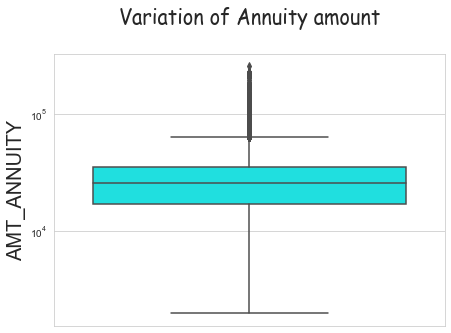

In [56]:
plt.figure(figsize=(7, 5))
plt.title('Variation of Annuity amount',fontname='comic sans MS')
sns.boxplot(data =df_target_0, x= "AMT_ANNUITY",orient='v', color= 'cyan')
plt.yscale('log')
plt.show()

INFERENCES

1. Outliers are present in annuity amount.

2. The first quartile is bigger than third quartile which means most of the annuity clients are from first quartile.


 #### 4.2 Boxplot for credit amount

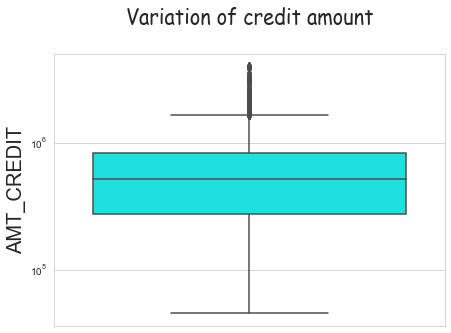

In [57]:
# Boxplot for credit amount
plt.figure(figsize=(7, 5))
plt.title('Variation of credit amount',fontname='comic sans MS')
sns.boxplot(data =df_target_0, x= "AMT_CREDIT",orient='v', color='cyan')
plt.yscale('log')
plt.show()

INFERENCES

1. Outliers can be observed in credit amount.

2. The first quartile is bigger than third quartile which means most of the credits of clients are present in the first quartile


 #### 4.3 Boxplot for income

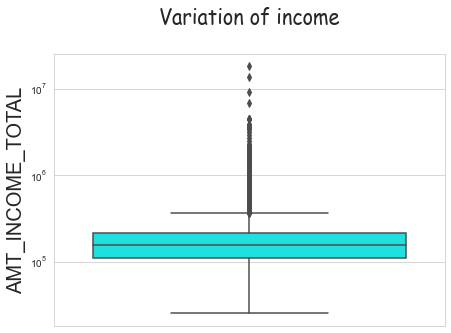

In [58]:
# Boxplot for income
plt.figure(figsize=(7, 5))
plt.title('Variation of income',fontname='comic sans MS')
sns.boxplot(data =df_target_0, x= "AMT_INCOME_TOTAL",orient='v', color='cyan')
plt.yscale('log')
plt.show()

INFERENCES

1. Significant outliers are noticed in income.

2. The third quartiles is very small for income amount.



## 5. Univariate Analysis for target 1

 #### 5.1 Boxplot for annuity

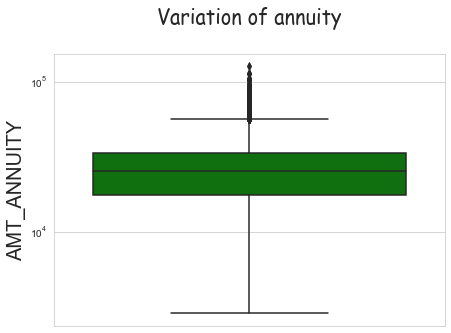

In [59]:
# Boxplot for AMT_ANNUITY amount
plt.figure(figsize=(7, 5))
plt.title('Variation of annuity',fontname='comic sans MS')
sns.boxplot(data =df_target_1, x= "AMT_ANNUITY",orient='v', color ='green')
plt.yscale('log')
plt.show()

Inferences from the above graph

1. Some outliers are noticed in annuity amount.
2. The first quartile is bigger than third quartile for which means most of the annuity clients are from first quartile.


 #### 5.2 Boxplot for credit amount

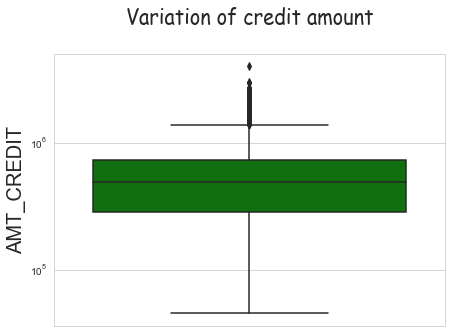

In [60]:
# Boxplot for credit amount
plt.figure(figsize=(7, 5))
plt.title('Variation of credit amount',fontname='comic sans MS')
sns.boxplot(data =df_target_1, x= "AMT_CREDIT",orient='v',color ='green' )
plt.yscale('log')
plt.show()

Inferences from the above graph

1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile which means most of the credits of clients are present in the first quartile.

 #### 5.3 Boxplot for income

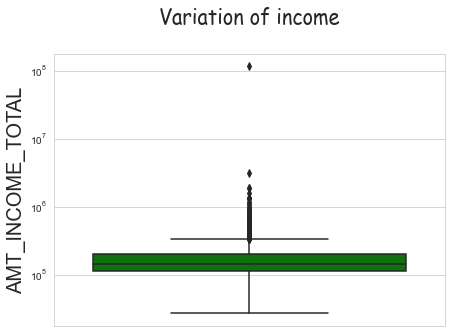

In [61]:
# Boxplot for income
plt.figure(figsize=(7, 5))
plt.title('Variation of income', fontname='comic sans MS')
sns.boxplot(data =df_target_1, x= "AMT_INCOME_TOTAL",orient='v', color ='green')
plt.yscale('log')
plt.show()

Inferences from the above graph:

1. The third quartiles is very small for income amount.
2. Some outliers are noticed in income amount.
3. Most of the clients of income are present in first quartile.


## 6. Bivariate Ananlysis

### 6.1 For target 0

#### 6.1.1 Box plots for Income earned and Education Qualification

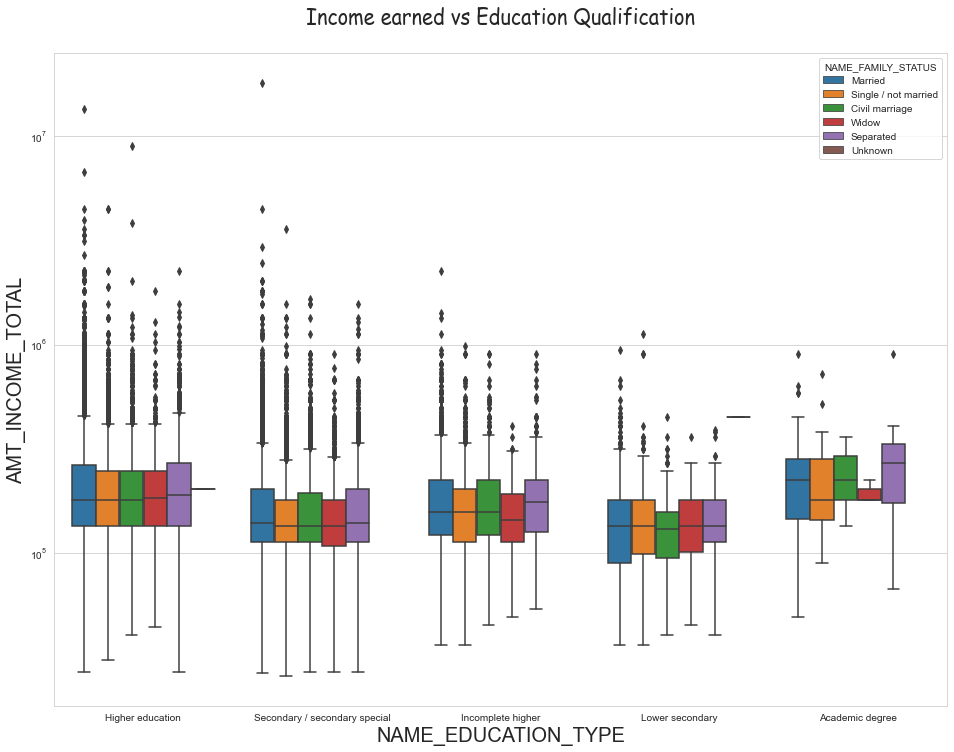

In [62]:
# Box plotting for Income earned in logarithmic scale

plt.figure(figsize=(16,12))
plt.title('Income earned vs Education Qualification', fontname='comic sans MS')
sns.boxplot(data =df_target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.yscale('log')
plt.xticks(rotation=0)
plt.show()

INFERENCES

1. Education type 'Higher education' the income amount mean is mostly equal within all marital status. It contains many outliers.

2. Education type ‘ Academic degree’ , there are less outliers but they are having the income amount little higher that the Higher education.

3. Education type ‘Lower secondary’ of family status as ‘civil marriage’ have less income amount than the others.

#### 6.1.2 Box plots of Credit amount vs Education Qualification

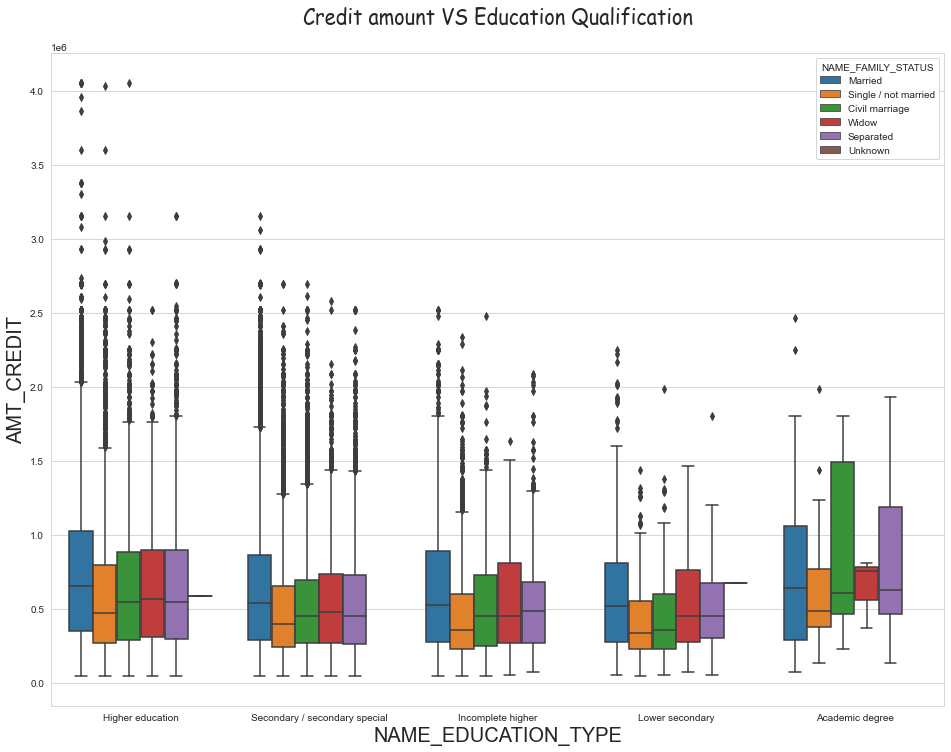

In [63]:
plt.figure(figsize=(16,12))
plt.title('Credit amount VS Education Qualification', fontname='comic sans MS')
sns.boxplot(data =df_target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.xticks(rotation=0)
plt.show()

INFERENCES 

1. Education type 'Higher education' the credit amount mean is different for the each marital status. It is lowest for single/unmarried people and highest for married people.  It contains many outliers.

2. Clients with Education type ‘ Academic degree’ have the credit amount little higher that the Higher education and there are less outliers.

3. Education type ‘Lower secondary’ of family status ‘single/unmarried’ are having less credit amount than the others.

### 6.2 For Target 1

#### 6.2.1 Box plots for Income amount vs Education Qualification

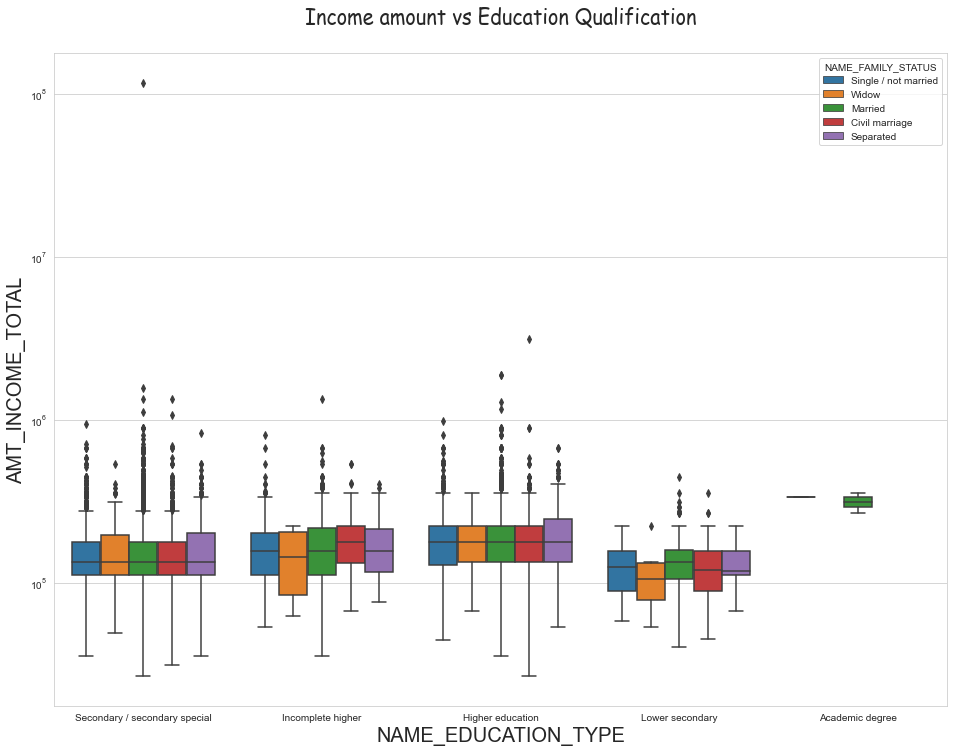

In [64]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.title('Income amount vs Education Qualification', fontname='comic sans MS')
sns.boxplot(data =df_target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.yscale('log')
plt.xticks(rotation=0)
plt.show()

INFERENCES

1. Clients with Education type 'Higher education' have similar income amount among all the family statuses.

2. Only few outliers can be observed for Academic Degree clients

3. Clients with Education type 'Lower secondary'  have less income amount than the others.

#### 6.2.2 Box plots of Credit amount vs Education Qualification

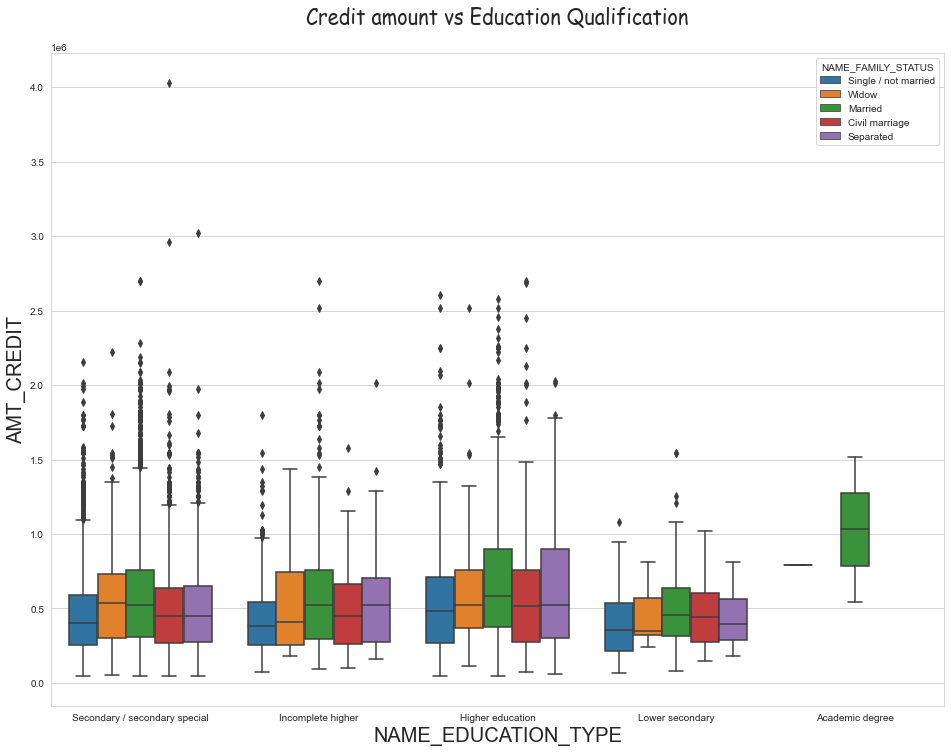

In [65]:
# Box plot for credit amount

plt.figure(figsize=(16,12))
sns.boxplot(data =df_target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Qualification', fontname='comic sans MS')
plt.xticks(rotation=0)
plt.show()

INFERENCES

1. Education type ‘Academic degree’ with family status as ‘married’ people are having higher credit amount as compared to other family status people and also to the other education type people.

2. In the Education type ‘Higher education’ , the family status of ‘Married’ have higher  credit amount than the other family statuses.

3. Very few outliers present in the education type ‘Lower Secondary’.

4. The family status ‘Widow’ and ‘Separated ’ are having very few outliers for the education type ‘Higher education’. 

## 7. Reading the previous application dataset.

In [66]:
#read the data set of "previous application" in prev_df.
#prev_df=pd.read_csv(r"C:\Users\Sam\previous_application.csv")
prev_df=pd.read_csv(r"previous_application.csv")
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### 7.1 Data inspection

In [67]:
prev_df.shape

(1670214, 37)

In [68]:
# Checking for null percentages inside the columns
miss_data_prev = prev_df.isnull().sum()/len(prev_df.index)*100
miss_data_prev

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [69]:
# Finding the number of columns which have missing values percentage greater than or equal to 40%.
miss_data_prev=miss_data_prev[miss_data_prev.values>=40]
miss_data_prev.count()

11

In [70]:
# Removing these 11 columns

list_null_cols=list(miss_data_prev[miss_data_prev.values>=40].index) 
# len(list_null_cols)
prev_df.drop(labels=list_null_cols,axis=1,inplace=True)
prev_df.shape

(1670214, 26)

In [71]:
# Inspecting the column NAME_CASH_LOAN_PURPOSE
prev_df['NAME_CASH_LOAN_PURPOSE'].value_counts() 

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

- We see that there are values like 'XAP' and 'XNA' which are not needed , therefore we will remove them.

In [72]:
# Removing the rows which have 'XNA' and 'XAP' in their columns
prev_df=prev_df.drop(prev_df[prev_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_df=prev_df.drop(prev_df[prev_df['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)


In [73]:
prev_df.shape

(69635, 26)

### 7.2 Merging the two datasets : Application dataset and Previous Application dataset

In [74]:
merge_df =pd.merge(left=application_df,right=prev_df,how='inner',on='SK_ID_CURR')

In [75]:
merge_df.shape

(51420, 55)

In [76]:
# Renaming the columns of the merged dataframe

merge_df = merge_df.rename({'NAME_CONTRACT_TYPE_x' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_x':'AMT_CREDIT','AMT_ANNUITY_x':'AMT_ANNUITY',
                         'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START_x' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_x':'HOUR_APPR_PROCESS_START',
                         'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV','AMT_CREDIT_y':'AMT_CREDIT_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITY_y':'AMT_ANNUITY_PREV','AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV',
                         'WEEKDAY_APPR_PROCESS_START_y':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_START_y':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

 - Since we have many columns which are not necessary for our analysis , we will drop those columns.

In [77]:
# Dropping columns not needed

merge_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
              'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [78]:
merge_df.shape

(51420, 44)

## 8 Univariate Analysis for the merged dataset.

### 8.1 Purpose of Cash Loan

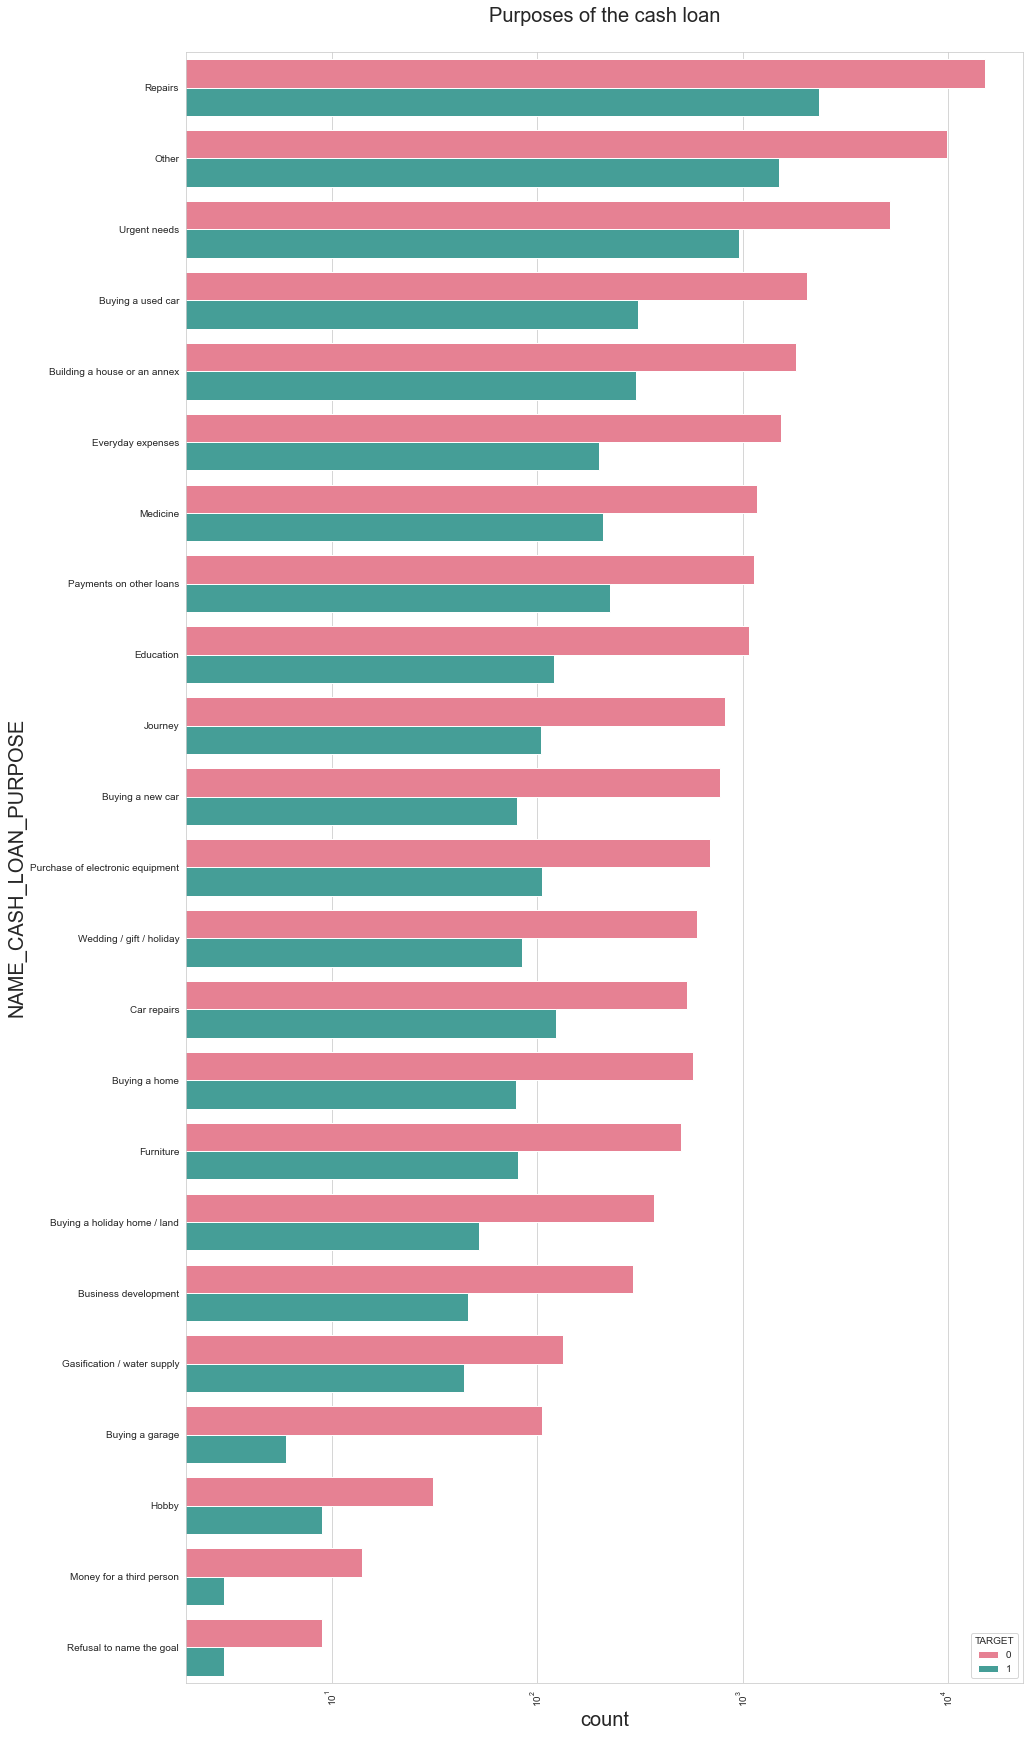

In [79]:
# Purposes for taking loan
sns.set_style('whitegrid')
plt.figure(figsize=(15,30))
plt.title('Purposes of the cash loan')
sns.countplot(data = merge_df, y= 'NAME_CASH_LOAN_PURPOSE', 
            order=merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET', palette="husl")
plt.xticks(rotation=90)
plt.xscale('log')                  

INFERENCES

1. In general, there are fewer non-default clients as compared to defaulting clients.

2. Most rejection of loans comes from 'repairs' requests.

3. For education purposes we see an equal number of approval and rejection.

### 8.2 Purposes of the cash loan with Outcome

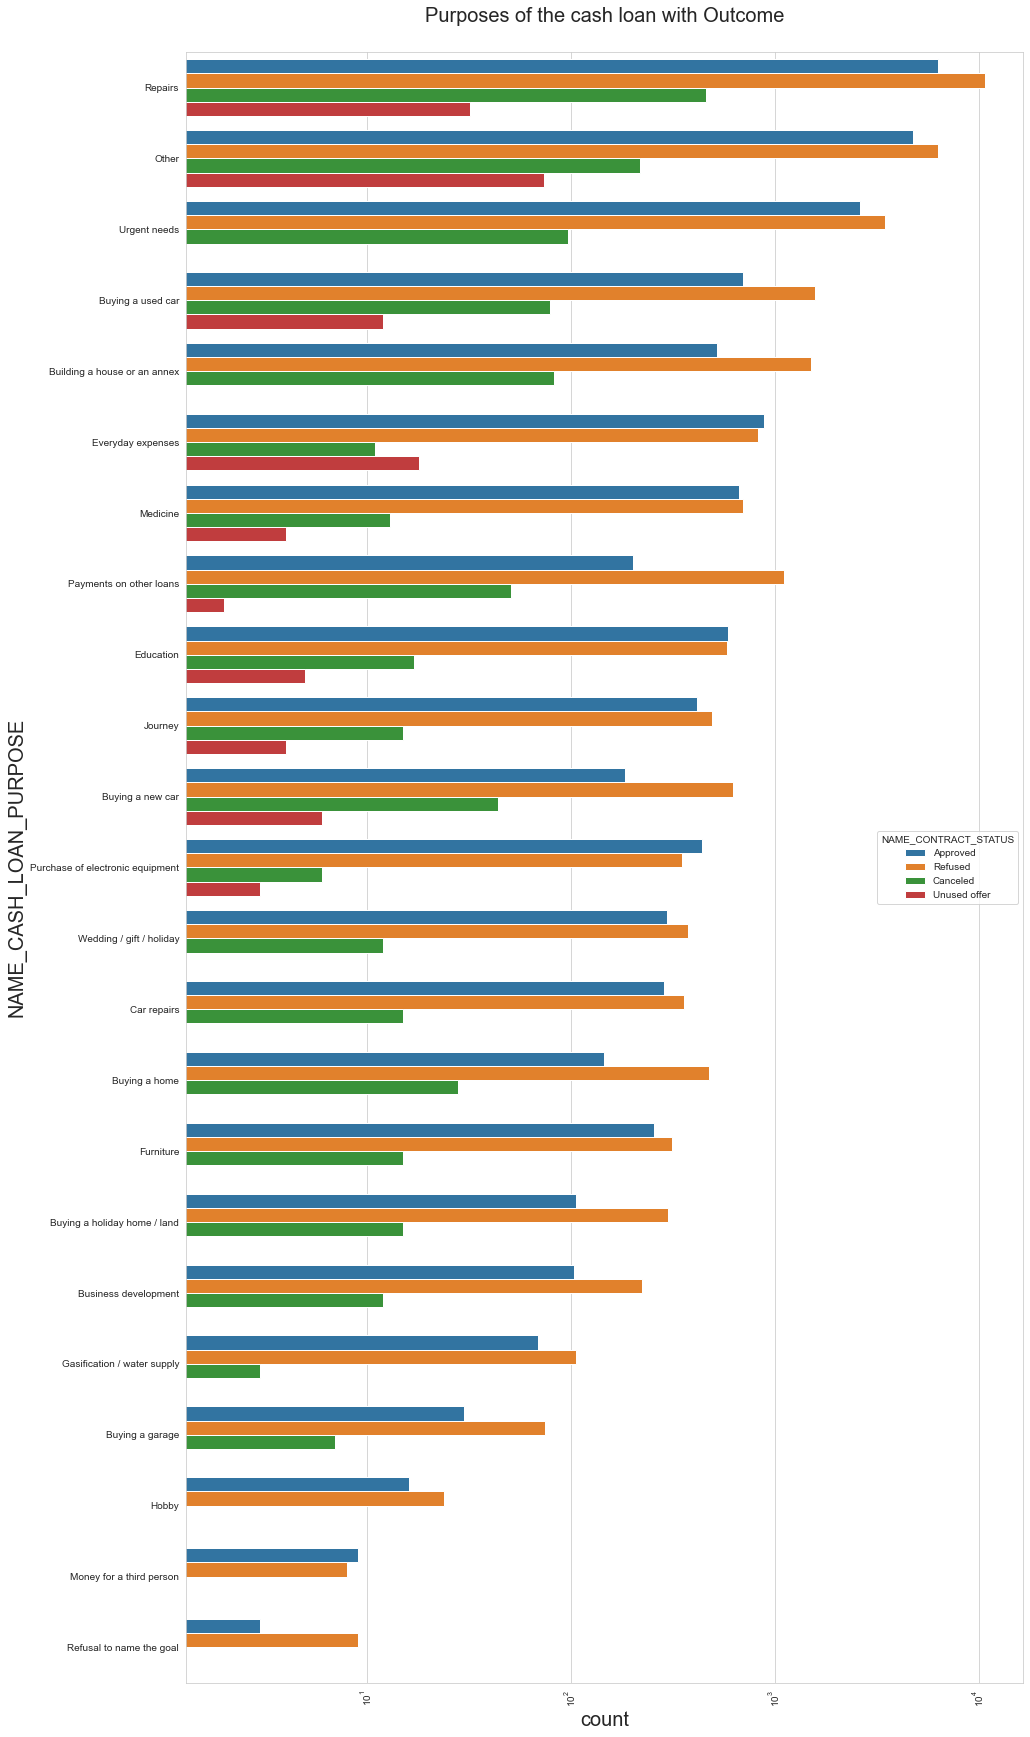

In [80]:
# Plotting for Distribution of Purposes of the cash loan with Outcome

sns.set_style('whitegrid')
plt.figure(figsize=(15,30))
plt.title('Purposes of the cash loan with Outcome')
sns.countplot(data = merge_df, y= 'NAME_CASH_LOAN_PURPOSE', 
            order=merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.xscale('log')                  

INFERENCES

1. Loan purposes with 'Repairs' are facing more difficulties in payment on time.

2. There are more number of rejections as compared to accepted loans.

3. They seems to be risk in repairs as it has highest number of refusals, cancelled and unused loan amounts.

In [81]:
merge_df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'ORGANIZATION_TYPE',
       'RANGE_AMT_CREDIT', 'RANGE_AMT_INCOME', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_PREV', 'AMT_ANNUITY_PREV', 'AMT_APPLICATION',
       'AMT_CREDIT_PREV', 'AMT_GOODS_PRICE_PREV', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

## 9. Bivariate Anaysis for the Merged dataset

### 9.1 Box plots for Previous Credit amount Vs Loan Purpose for various professions

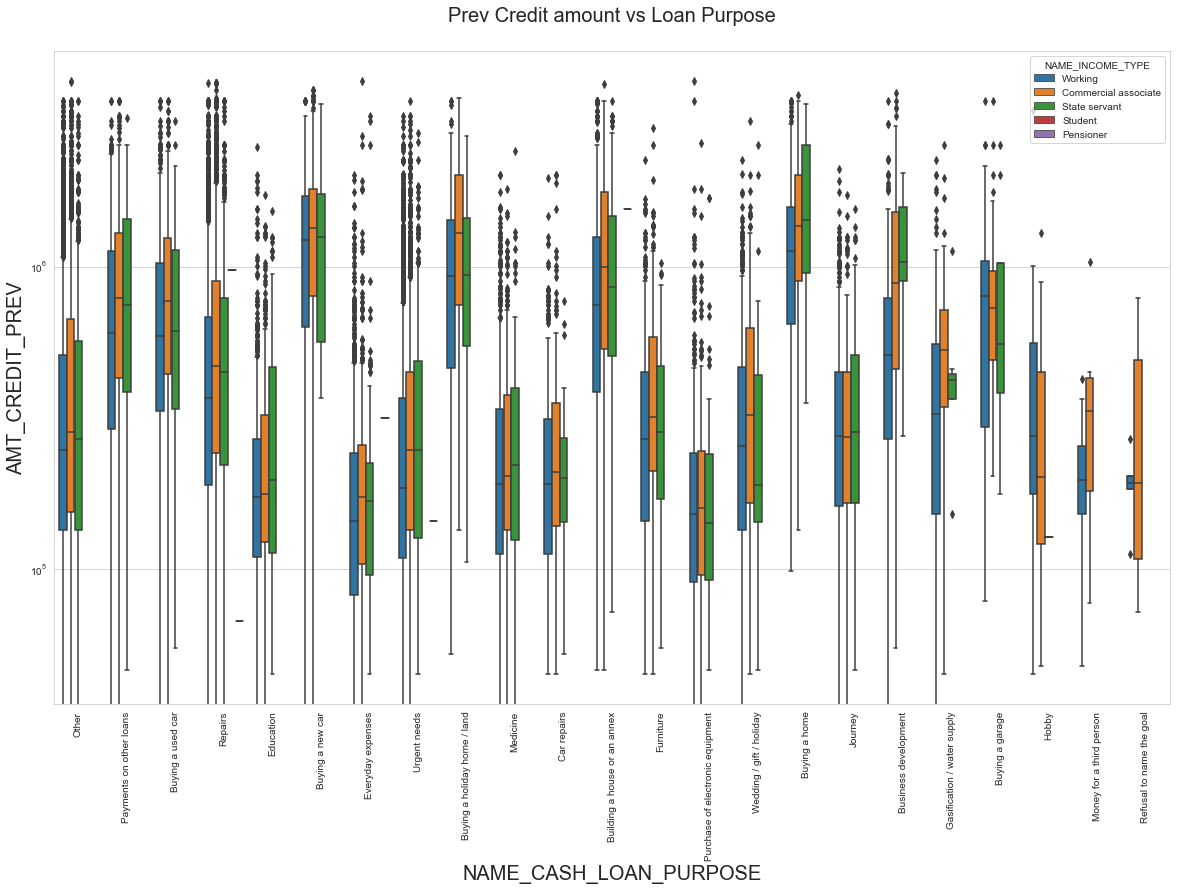

In [82]:
# Box plot for Previous Credit amount Vs Loan Purpose

plt.figure(figsize=(20,12))
plt.title('Prev Credit amount vs Loan Purpose')
sns.boxplot(data =merge_df, x='NAME_CASH_LOAN_PURPOSE',y='AMT_CREDIT_PREV',hue='NAME_INCOME_TYPE',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

INFERENCES

1. Loan purposes like 'Buying a home', 'Buying a land', 'Buying a new car' and 'Building a house' have high number of credits.

2. Working profession have less amount of credit applied.

3. Less number of credits have been applied for the cash loan purposes personal everyday usage.

### 9.2 Box plots for Previous Credit amount  vs Housing type 

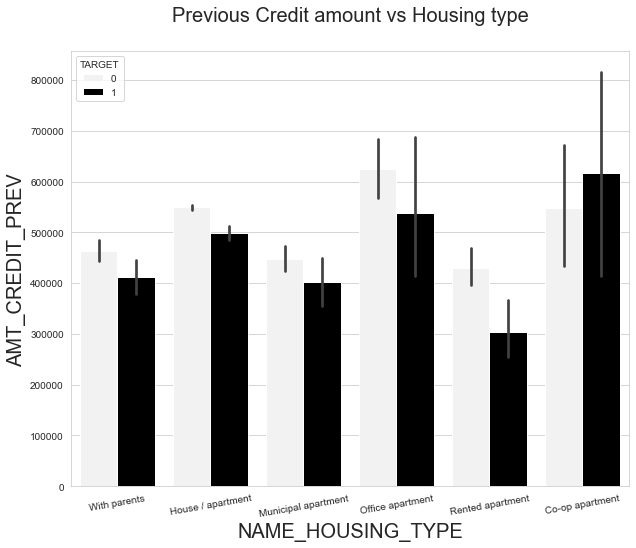

In [83]:
# Box plot for Previous Credit amount  vs Housing type 

plt.figure(figsize=(10,8))
plt.title('Previous Credit amount vs Housing type')
sns.barplot(data =merge_df,x='NAME_HOUSING_TYPE', y='AMT_CREDIT_PREV',hue='TARGET', color='black')
plt.xticks(rotation=10)
plt.show()

INFERENCES

1. Office apartment is having higher credit for target 0. 

2. Co-op apartment is having higher credit for target 1. 

3. High variation can be observed in defaulting clients in office apartment and co-op apartment.

## RECOMMENDATIONS

The company should be cautious of the following flags while providing loans to customers if:

~ Applicant's employment experience is less than 10 years.

~ Applicant falls in the age group of 21-30. 

~ Applicant earns in the income bracket of 25K to 1.125K.

~ Education type is Lower secondary or Secondary/Secondary.

~ The applicant is a Low Skilled Labourer.

~ Collaterals with value in between 40K to 4.5 Lakhs.